# TSNE Analysis

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download from Atlas and Load Data

In [3]:
from dpet.ensemble import Ensemble


ensembles = [
    Ensemble('PED00423e001', data_path='C:/Users/nikol/Documents/test_dir/testington/PED00423e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/testington/PED00423e001.top.pdb'),
    Ensemble('PED00424e001', data_path='C:/Users/nikol/Documents/test_dir/testington/PED00424e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/testington/PED00424e001.top.pdb')
]
data_dir = 'C:/Users/nikol/Documents/test_dir/testington'

analysis = EnsembleAnalysis(ensembles, data_dir)
analysis.load_trajectories()

Loading trajectory for PED00423e001...
Loading trajectory for PED00424e001...


{'PED00423e001': <mdtraj.Trajectory with 1000 frames, 1374 atoms, 92 residues, without unitcells at 0x19bd9764f10>,
 'PED00424e001': <mdtraj.Trajectory with 1000 frames, 1374 atoms, 92 residues, without unitcells at 0x19be98bf2e0>}

In [4]:
analysis.random_sample_trajectories(sample_size=50)

50 conformations sampled from PED00423e001 trajectory.
50 conformations sampled from PED00424e001 trajectory.


{'PED00423e001': <mdtraj.Trajectory with 50 frames, 1374 atoms, 92 residues, without unitcells at 0x19bdbb34970>,
 'PED00424e001': <mdtraj.Trajectory with 50 frames, 1374 atoms, 92 residues, without unitcells at 0x19bd97648e0>}

## Featurization

In [5]:
analysis.extract_features(featurization='ca_dist')

Performing feature extraction for Ensemble: PED00423e001.
Transformed ensemble shape: (50, 4095)
Performing feature extraction for Ensemble: PED00424e001.
Transformed ensemble shape: (50, 4095)
Feature names: ['GLY1-MET3', 'GLY1-THR4', 'GLY1-PRO5', 'GLY1-SER6', 'GLY1-THR7', 'GLY1-PRO8', 'GLY1-PRO9', 'GLY1-ARG10', 'GLY1-SER11', 'GLY1-ARG12', 'GLY1-GLY13', 'GLY1-THR14', 'GLY1-ARG15', 'GLY1-TYR16', 'GLY1-LEU17', 'GLY1-ALA18', 'GLY1-GLN19', 'GLY1-PRO20', 'GLY1-SER21', 'GLY1-GLY22', 'GLY1-ASN23', 'GLY1-THR24', 'GLY1-SER25', 'GLY1-SER26', 'GLY1-SER27', 'GLY1-ALA28', 'GLY1-LEU29', 'GLY1-MET30', 'GLY1-GLN31', 'GLY1-GLY32', 'GLY1-GLN33', 'GLY1-LYS34', 'GLY1-THR35', 'GLY1-PRO36', 'GLY1-GLN37', 'GLY1-LYS38', 'GLY1-PRO39', 'GLY1-SER40', 'GLY1-GLN41', 'GLY1-ASN42', 'GLY1-LEU43', 'GLY1-VAL44', 'GLY1-PRO45', 'GLY1-VAL46', 'GLY1-THR47', 'GLY1-PRO48', 'GLY1-SER49', 'GLY1-THR50', 'GLY1-THR51', 'GLY1-LYS52', 'GLY1-SER53', 'GLY1-PHE54', 'GLY1-LYS55', 'GLY1-ASN56', 'GLY1-ALA57', 'GLY1-PRO58', 'GLY1-LEU59',

{'PED00423e001': array([[0.6973477 , 1.0474741 , 1.3487437 , ..., 0.53713197, 0.56813425,
         0.533069  ],
        [0.7149209 , 1.0770499 , 1.2832351 , ..., 0.654567  , 1.0223187 ,
         0.6912824 ],
        [0.6003915 , 0.93056613, 1.2597162 , ..., 0.6819498 , 0.9638804 ,
         0.60954124],
        ...,
        [0.63794804, 0.96571165, 1.2355618 , ..., 0.68872553, 1.043972  ,
         0.68676305],
        [0.7243771 , 0.9541787 , 1.3305224 , ..., 0.55233186, 0.5274657 ,
         0.541421  ],
        [0.5837083 , 0.55649376, 0.92928165, ..., 0.70019907, 0.9606925 ,
         0.6520687 ]], dtype=float32),
 'PED00424e001': array([[0.53071964, 0.7563032 , 1.061332  , ..., 0.52905905, 0.69749695,
         0.51041824],
        [0.54896826, 0.4955696 , 0.76156074, ..., 0.5770485 , 0.76254594,
         0.65425146],
        [0.6309268 , 0.99613637, 1.3331137 , ..., 0.56514704, 0.7509108 ,
         0.63178784],
        ...,
        [0.645912  , 0.9972578 , 1.3181529 , ..., 0.7124571 ,

## Dimensionality Reduction

In [6]:
analysis.reduce_features(method='tsne', perplexity_vals = [10, 50], circular=True, range_n_clusters=range(2,10,1))

Concatenated featurized ensemble shape: (100, 4095)
tsne is running...


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

Best Perplexity: 10
Best Number of Clusters: 2


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

array([[ -9.867309  ,  18.753027  ],
       [  6.987641  , -23.487257  ],
       [  0.32269093,  10.257622  ],
       [  6.3275185 , -27.503384  ],
       [-12.341553  , -35.79481   ],
       [ 17.983128  ,  -6.053323  ],
       [-16.84088   ,  -3.514665  ],
       [ -0.08559208, -29.344648  ],
       [-16.707397  ,  10.132802  ],
       [ -1.0247505 , -35.39183   ],
       [ 11.699817  , -34.090923  ],
       [ -7.2203765 ,   0.22765599],
       [ -7.870679  ,  -8.254975  ],
       [ -8.193786  ,  26.109732  ],
       [  3.9313633 , -30.625357  ],
       [  4.8957653 , -12.313784  ],
       [-14.301176  ,   4.904171  ],
       [ -5.4944634 ,  24.485535  ],
       [-11.808392  ,  29.219542  ],
       [-12.595341  ,  -8.520101  ],
       [  3.786541  , -26.00754   ],
       [  7.6374288 , -20.901558  ],
       [-16.489378  , -23.903505  ],
       [-16.402876  , -29.359001  ],
       [  4.1918235 ,   8.47362   ],
       [ -0.8211579 , -16.413437  ],
       [  3.903526  ,  -3.4310231 ],
 

## Analysis

In [7]:
from dpet.visualization import Visualization


visualization = Visualization(analysis)

visualization.tsne_ramachandran_density(save=True)

This analysis is only valid for t-SNE reduction with phi_psi feature extraction.


array([<Axes: title={'center': 'Scatter plot (original labels)'}>,
       <Axes: title={'center': 'Scatter plot (clustering labels)'}>,
       <Axes: title={'center': 'Scatter plot (Rg labels)'}>,
       <Axes: title={'center': 'Density Plot'}>], dtype=object)

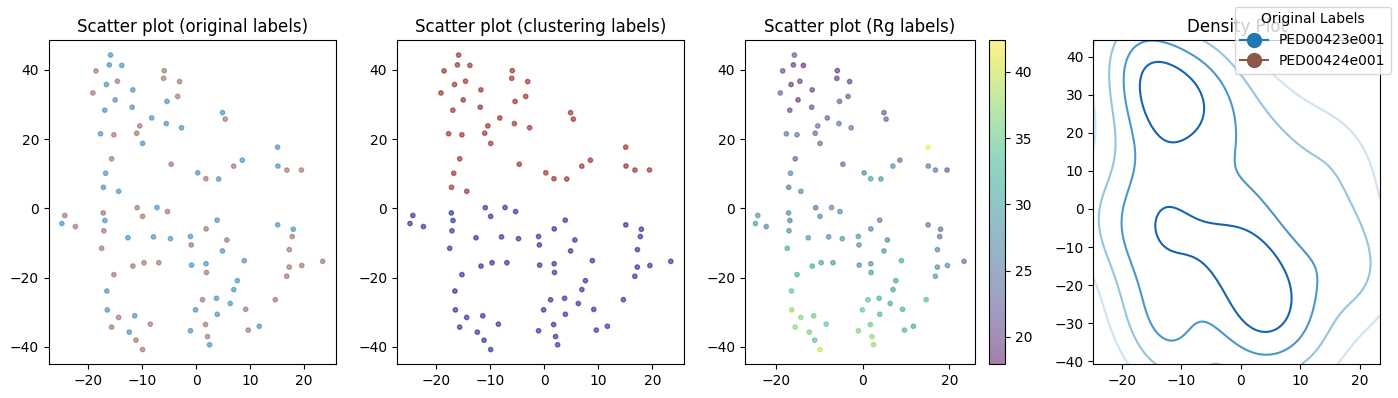

In [8]:
visualization.tsne_scatter(save=False)

In [9]:
visualization.generate_report()

Plots saved to C:\Users\nikol\Documents\test_dir\testington\plots\tsne.pdf


In [10]:
visualization.generate_custom_report()

Plots saved to C:\Users\nikol\Documents\test_dir\testington\plots\custom_report.pdf
